In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 6) for n in range(1, 6)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

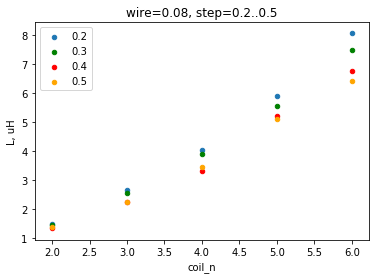

In [11]:
wire_dia = 0.08
rects08 = rects.loc[(rects['wire_dia (mm)'] == wire_dia)]

step = 0.2
rects08_02 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
ax = rects08_02.plot.scatter(x='coil_n', y='L, uH', title=f'wire={wire_dia}, step=0.2..0.5', label=step)

step = 0.3
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='green')

step = 0.4
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='red')

step = 0.5
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='orange')


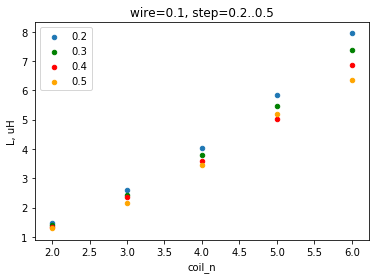

In [13]:
wire_dia = 0.1
rects08 = rects.loc[(rects['wire_dia (mm)'] == wire_dia)]

step = 0.2
rects08_02 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
ax = rects08_02.plot.scatter(x='coil_n', y='L, uH', title=f'wire={wire_dia}, step=0.2..0.5', label=step, grid=True)

step = 0.3
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='green')

step = 0.4
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='red')

step = 0.5
rects08_03 = rects08.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_03.plot.scatter(x='coil_n', y='L, uH', ax=ax, label=step, color='orange')
